# 상관관계 분석

- 변수들 간의 관련성을 분석하기 위해 사용하는 분석 방법.
- 하나의 변수가 다른 변수와 관련성이 있는지, 있다면 어느 정도의 관련성이 있는지
- 상관계수 r과 상관관계 정도
  - 완전 정 상관관계는 X의 값이 증가하면 Y의 값도 증가하는 형태로 r = 1이다. 
  - 완전 부 상관관계는 X의 값이 증가하면 Y의 값은 감소하는 형태로 r = -1이다. 
  - 강한 양의 상관관계는 r = 0.8이고, 약한 양의 상관관계는 0.3이다.
  - x와 y변수 간의 상관관계가 없는 경우에는 r = 0이 된다. 

- 상관관계 분석 수행

In [2]:
product = read.csv('C:\\Users\\ehfus\\Downloads\\R\\Part-III\\product.csv',header=T)
head(product,3)

,제품_친밀도,제품_적절성,제품_만족도
,<int>,<int>,<int>
1,3,4,3
2,3,3,2
3,4,4,4


In [3]:
# 요약통계량
summary(product)

  제품_친밀도     제품_적절성     제품_만족도   
 Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :3.000   Median :3.000  
 Mean   :2.928   Mean   :3.133   Mean   :3.095  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000  

In [5]:
sd(product$제품_친밀도)
sd(product$제품_적절성)
sd(product$제품_만족도)

[1] 0.9703446

[1] 0.8596574

[1] 0.8287436

- 변수 간의 상관계수 보기

In [10]:
cor(product$제품_친밀도, product$제품_적절성)
cor(product$제품_친밀도, product$제품_만족도)
cor(product$제품_만족도, product$제품_적절성)
cor(product$제품_적절성 + product$제품_친밀도, product$제품_만족도)

[1] 0.4992086

[1] 0.467145

[1] 0.7668527

[1] 0.7017394

- 전체 변수 간의 상관계수 보기

In [11]:
cor(product, method = 'pearson')

,제품_친밀도,제품_적절성,제품_만족도
제품_친밀도,1.0000000,0.4992086,0.4671450
제품_적절성,0.4992086,1.0000000,0.7668527
제품_만족도,0.4671450,0.7668527,1.0000000


- 방향성이 있는 색상으로 표현
  - 동일한 색상으로 그룹을 표시하고 색의 농도로 상관계수를 나타낸다. 

In [12]:
install.packages('corrgram')
library(corrgram)


package 'corrgram' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpyWgZsX\downloaded_packages


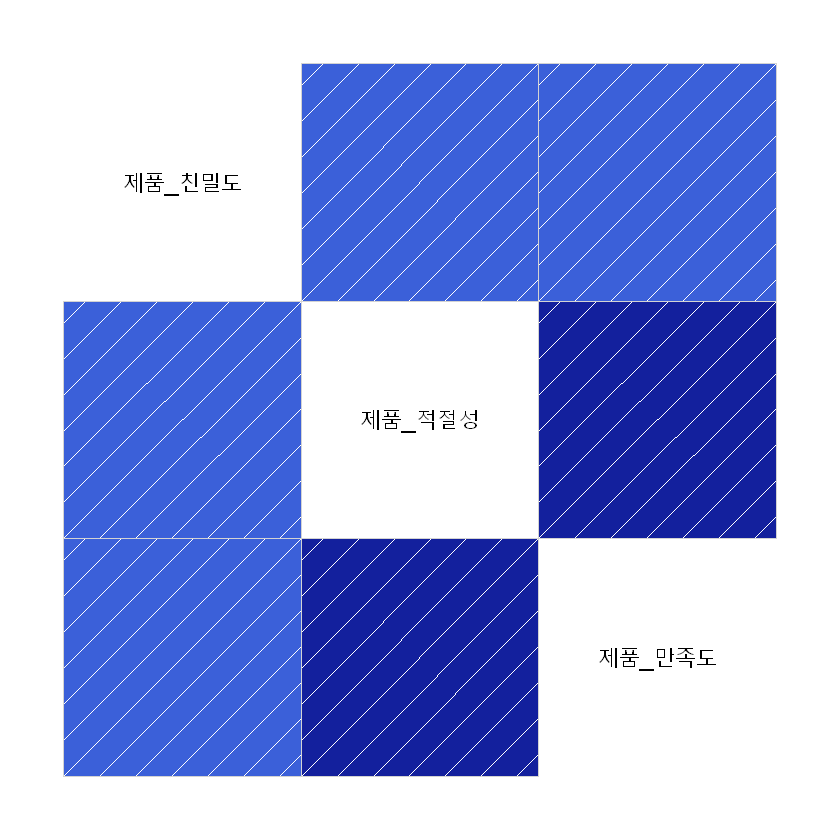

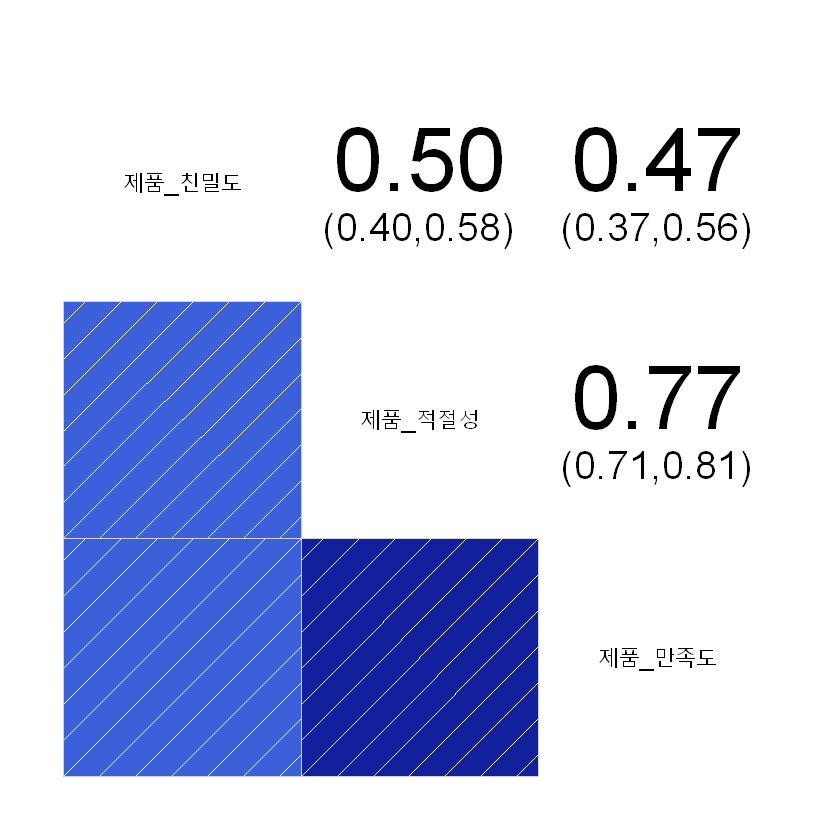

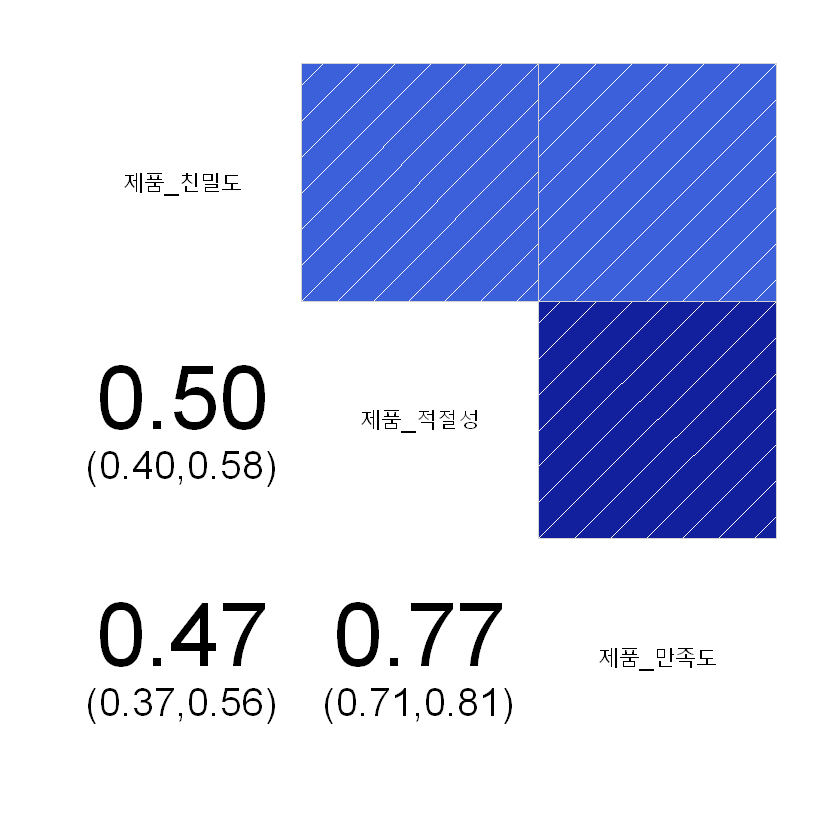

In [13]:
corrgram(product) # 색상 적용 - 동일 색상으로 그룹화 표시
corrgram(product, upper.panel = panel.conf) # 위쪽에 상관계수 추가
corrgram(product, lower.panel = panel.conf) # 아래쪽에 상관계수 추가

- 차트에 밀도곡선, 상관성, 유의확률(별표) 추가

In [14]:
install.packages('PerformanceAnalytics')
library(PerformanceAnalytics)

also installing the dependency 'quadprog'




package 'quadprog' successfully unpacked and MD5 sums checked
package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpyWgZsX\downloaded_packages


Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend




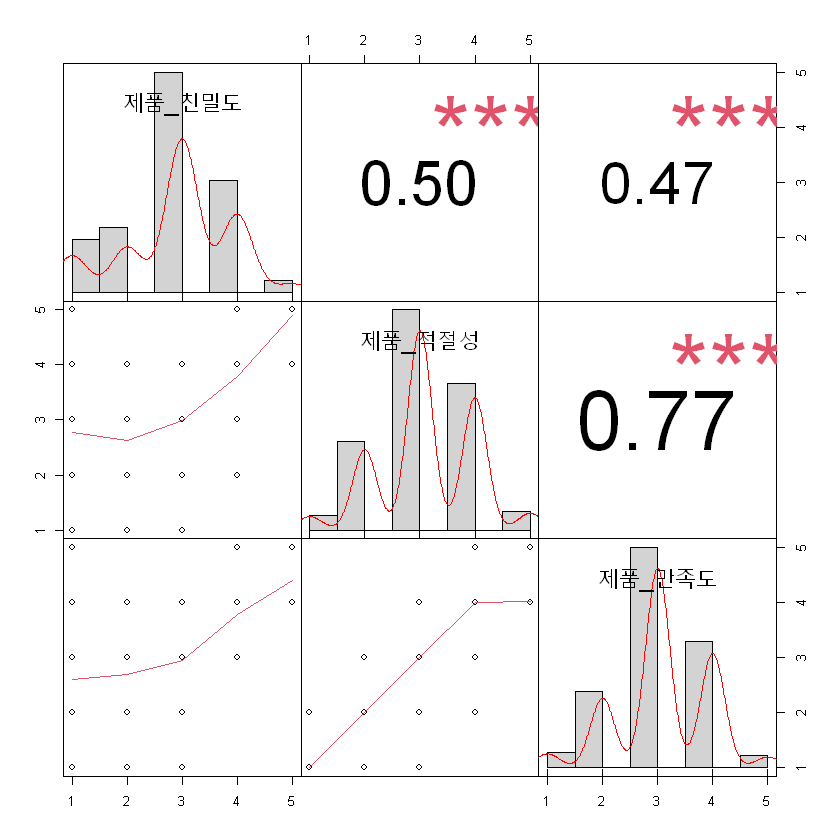

In [17]:
chart.Correlation(product, histogram =  , pch = '+')

In [19]:
# 서열척도 대상 상관계수
cor(product, method = 'spearman')

,제품_친밀도,제품_적절성,제품_만족도
제품_친밀도,1.0000000,0.5110776,0.5012007
제품_적절성,0.5110776,1.0000000,0.7485096
제품_만족도,0.5012007,0.7485096,1.0000000


- 상관관계 분석 결과 제시
  - 일반적으로 상관관계 분석 결과를 논문이나 보고서에 제시하는 경우에는 해당 변수들의 기본적인 기술통계량(평균과 표준편차)과 피어슨 상관계수를 함께 제시하는 것이 좋다.

- 상관관계의 종류에는 Y와 X간의 상관관계를 나타내는 단순 상관관계, 둘 이상의 변수들이 어느 한 변수와 관계를 갖는 경우 그 정도를 파악하기 위한 다중 상관관계, 두 변수 관계의 정도를 파악하고자 할 때 제 3의 변수가 두 변수 모두에 영향을 미치고 있는 경우 이를 통제한 다음 분석하는 편(Partial) 상관관계, 제 3의 변수가 어느 한 변수에만 영향을 미치는 경우 이를 통제한 후 분석하는 부분(Semi partial) 상관관계가 있다. 일반적으로 단순 상관관계분석과 다중 상관관계 분석을 많이 사용한다. 